# Linear Regression:01

A notebook to implement a pretty simple model to learn about Linear Regression.

## Generate Data

Here, we will generate a data with a known function, i.e., we will simulate data. The new term for this is _Generative AI_ :). The advantage is, we exactly know the model. So, we will know if our understanding is correct.

Simulation is a very powerful technique when we are developing new theory or implementing a known theory. The ground truth is known, so we check our understanding, can debug if things do not go as expected.

Here, we will consider the following model.

$$
y = -1 + 2x_1 \\
x_1 \sim U(-1,1)
$$

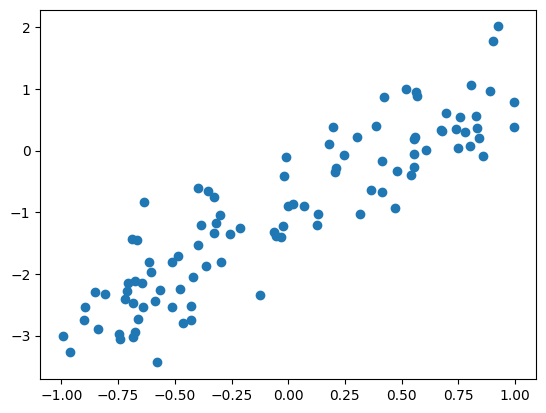

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = 2*(np.random.random(n))-1
b0 = -1
b1 = 2
y = b0 + b1*x
noise = np.random.normal(0,0.5,n)
y = y + noise 
plt.scatter(x,y)

## Fit/ Train:  Let us fit model using sklearn's APIs

In [2]:
from sklearn.linear_model import LinearRegression

# Reshape x to be a 2D array with one column
X = np.reshape(x, (n, 1))


# Fit the linear regression model
reg = LinearRegression()
reg.fit(X, y)

# Print the coefficients and the score
print('coefs', reg.coef_)
print('intercepts', reg.intercept_)
print('score', reg.score(X, y))

coefs [1.98992655]
intercepts -0.9556999786482694
score 0.8181079845791537


In [3]:
# Fit the linear regression model but w/o intercept
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
# Print the coefficients and the score
print('coefs', model.coef_)
print('intercepts', model.intercept_)
print('score', model.score(X, y))

coefs [2.06639893]
intercepts 0.0
score 0.26761225800328803


## Diagnosis
Asses the model fit and observe how the errors are!

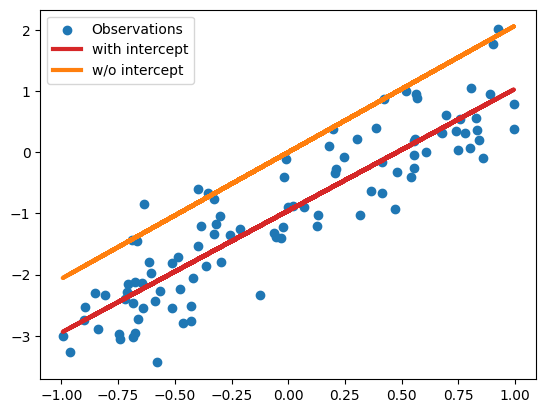

In [4]:
yh_b0 = reg.predict(X)
plt.scatter(x,y, label='Observations')
plt.plot(x,yh_b0,linewidth=3, color="tab:red", label='with intercept')

yh = model.predict(X)
plt.plot(x,yh,linewidth=3, color="tab:orange",label='w/o intercept')
plt.legend()

## Evaluation
Report the model metrics

In [5]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, yh)
print('mse w/o intercept', mse)

mse = mean_squared_error(y, yh_b0)
print('mse with intercept', mse)

mse w/o intercept 1.212484058759364
mse with intercept 0.301126242927177


Note: 

We did not create train and test splits.
Since it was a simulation, if we split create a test split, the model behavior will change much.
In other words, the train and test will have identical distributions by design, with very high probability. 

However, when solving real world problems, where we are not sure about the data generative process, the hold out methods is essentials to test the generalization ability of the model , beyond the training data.

## Questions

1. Will the MSE improve if I increase the data by 10 fold? In other words, will increasing the data size lead to model improvement?
2. How is MSE related to the noise variance?
3. Can the MSE be lowered by adding more features?